<a href="https://colab.research.google.com/github/bala5071/EECE5644-Machine-Learning/blob/main/Q3_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing the Dataset

In [ ]:
import csv



# Name of file to process
filename = '/content/agaricus-lepiota.data'


# Learn the names of all categories present in the dataset,
# and map them to 0,1,2,...

col_maps = {}


print("Processing",filename,"...",end="")
with open(filename) as csvfile:
    fr = csv.reader(csvfile, delimiter=',')
    rows = 0
    for row in fr:
        rows += 1
        if rows == 1:
            columns = len(row)
            for c in range(columns):
                col_maps[c] = {}

        for (c,label) in enumerate(row):
            if label not in col_maps[c]:
                index = len(col_maps[c])
                col_maps[c][label] = index
print(" done")

print("Read %d rows having %d columns." % (rows,columns))
print("Category maps:")
for c in range(columns):
    print("\t Col %d: " % c, col_maps[c])



# Construct matrix X, containing the mapped
# features, and vector y, containing the mapped
# labels.

X = []
y = []

print("Converting",filename,"...",end="")
with open(filename) as csvfile:
    fr = csv.reader(csvfile, delimiter=',')
    for row in fr:
        label = row[0]
        y.append(col_maps[0][label])

        features = []
        for (c,label) in enumerate(row[1:]):
            features.append(col_maps[c+1][label])

        X.append(features)

print(" done")


# Store them to files.

with open('X_msrm.csv', 'w') as csvfile:
    fw = csv.writer(csvfile, delimiter=',')
    for features in X:
        fw.writerow(features)

with open('y_msrm.csv', 'w') as csvfile:
    fw = csv.writer(csvfile, delimiter=',')
    for label in y:
        fw.writerow([label])


Processing /content/agaricus-lepiota.data ... done
Read 8124 rows having 23 columns.
Category maps:
	 Col 0:  {'p': 0, 'e': 1}
	 Col 1:  {'x': 0, 'b': 1, 's': 2, 'f': 3, 'k': 4, 'c': 5}
	 Col 2:  {'s': 0, 'y': 1, 'f': 2, 'g': 3}
	 Col 3:  {'n': 0, 'y': 1, 'w': 2, 'g': 3, 'e': 4, 'p': 5, 'b': 6, 'u': 7, 'c': 8, 'r': 9}
	 Col 4:  {'t': 0, 'f': 1}
	 Col 5:  {'p': 0, 'a': 1, 'l': 2, 'n': 3, 'f': 4, 'c': 5, 'y': 6, 's': 7, 'm': 8}
	 Col 6:  {'f': 0, 'a': 1}
	 Col 7:  {'c': 0, 'w': 1}
	 Col 8:  {'n': 0, 'b': 1}
	 Col 9:  {'k': 0, 'n': 1, 'g': 2, 'p': 3, 'w': 4, 'h': 5, 'u': 6, 'e': 7, 'b': 8, 'r': 9, 'y': 10, 'o': 11}
	 Col 10:  {'e': 0, 't': 1}
	 Col 11:  {'e': 0, 'c': 1, 'b': 2, 'r': 3, '?': 4}
	 Col 12:  {'s': 0, 'f': 1, 'k': 2, 'y': 3}
	 Col 13:  {'s': 0, 'f': 1, 'y': 2, 'k': 3}
	 Col 14:  {'w': 0, 'g': 1, 'p': 2, 'n': 3, 'b': 4, 'e': 5, 'o': 6, 'c': 7, 'y': 8}
	 Col 15:  {'w': 0, 'p': 1, 'g': 2, 'b': 3, 'n': 4, 'e': 5, 'y': 6, 'o': 7, 'c': 8}
	 Col 16:  {'p': 0}
	 Col 17:  {'w': 0, 'n':

Code for the Task

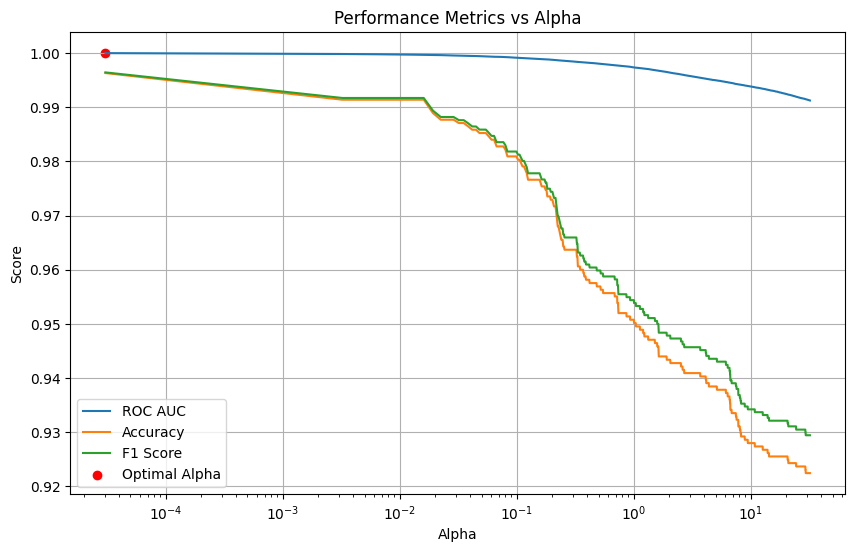

Optimal Alpha: 3.0517578125e-05
Accuracy score: 0.9963076923076923
F1 score: 0.9964285714285714
Confusion matrix:
 [[782   0]
 [  6 837]]
(1625, 2)
AUC: 0.9999848306953912


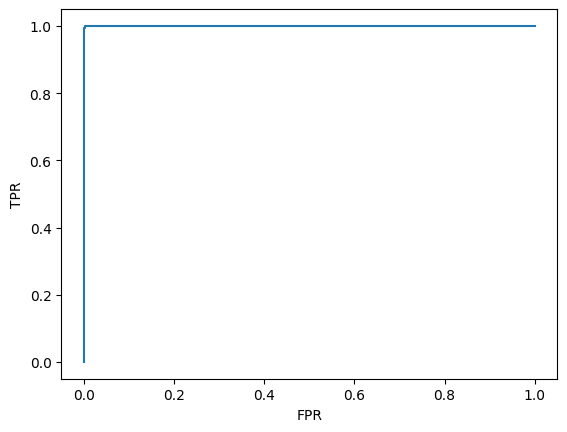

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score , confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Load preprocessed data
X = pd.read_csv('X_msrm.csv', header=None)
y = pd.read_csv('y_msrm.csv', header=None).values.ravel()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize parameters
alp = np.linspace(2**-15, 2**5, 10000)  # Range of alpha values to try
roc_auc_scores = []
acc_scores = []
f1_scores = []

# Train model with different alpha values
for alpha in alp:
    clf = CategoricalNB(alpha=alpha)
    clf.fit(X_train, y_train)
    y_probs = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    roc_auc_scores.append(roc_auc_score(y_test, y_probs[:,1]))
    acc_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Find the index of the alpha value that maximizes ROC AUC
max_roc_auc_index = np.argmax(roc_auc_scores)
optimal_alpha = alp[max_roc_auc_index]

# Plot the performance metrics
plt.figure(figsize=(10, 6))
plt.plot(alp, roc_auc_scores, label='ROC AUC')
plt.plot(alp, acc_scores, label='Accuracy')
plt.plot(alp, f1_scores, label='F1 Score')
plt.scatter(optimal_alpha, roc_auc_scores[max_roc_auc_index], color='red', label='Optimal Alpha')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Performance Metrics vs Alpha')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Alpha:", optimal_alpha)

classf = CategoricalNB(alpha=optimal_alpha)
classf.fit(X_train, y_train)

y_prediction =  classf.predict(X_test)

accu = accuracy_score(y_test,y_prediction)
print("Accuracy score:",accu)

f1score = f1_score(y_test,y_prediction)
print("F1 score:",f1score)

confm = confusion_matrix(y_test,y_prediction)
print("Confusion matrix:\n",confm)

y_prob = classf.predict_proba(X_test)

print(y_prob.shape)

fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(fpr,tpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
fig.savefig("ROC.pdf", bbox_inches="tight")

auc = roc_auc_score(y_test,y_prob[:,1])
print("AUC:",auc)